# Calibration Analysis

In [1]:
%matplotlib inline

Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

Source file

In [3]:
file = '..\data\m07mar.csv'

Read file

In [4]:
results = pd.read_csv(file)

Sample results

In [5]:
results.head()

,IrE,ErE,Reward,Param,Value,Q-value
0,0.300,0.126,0.0,averageRoomVentilationRate,10.0,0.000
1,0.300,0.090,1.0,averageRoomVentilationRate,4.0,0.100
2,0.362,0.250,-1.0,averageRoomVentilationRate,4.0,-0.002
3,0.300,0.350,-1.0,averageRoomVentilationRate,0.0,-0.100
4,0.300,0.350,-1.0,averageRoomVentilationRate,0.0,-0.190


### Raw Results

Plot raw incidence rate errors

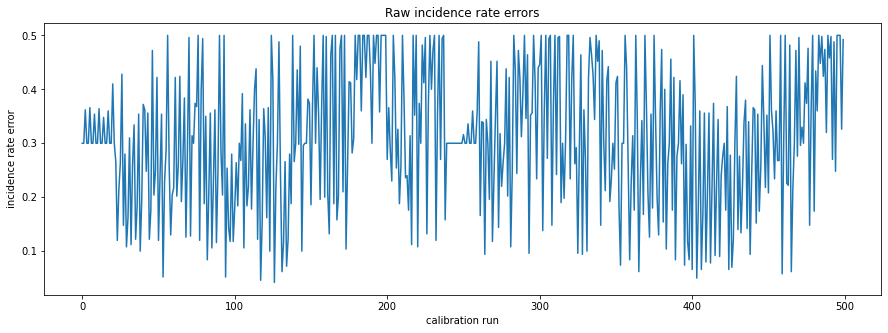

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(results['IrE'])
plt.ylabel('incidence rate error')
plt.xlabel('calibration run')
plt.title('Raw incidence rate errors')
plt.show()

Plot raw exposure rate errors

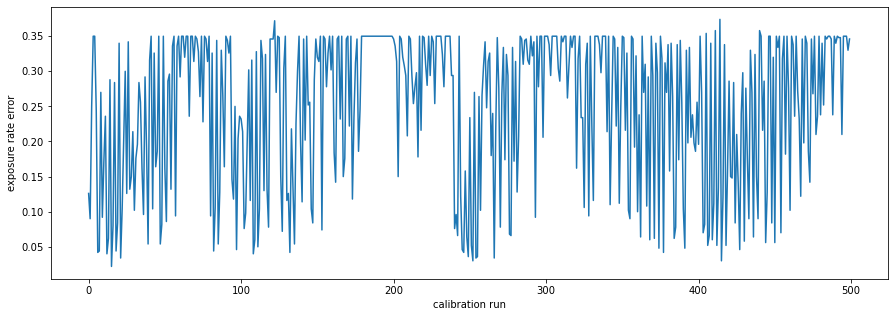

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(results['ErE'])
plt.ylabel('exposure rate error')
plt.xlabel('calibration run')
plt.show()

Plot rewards

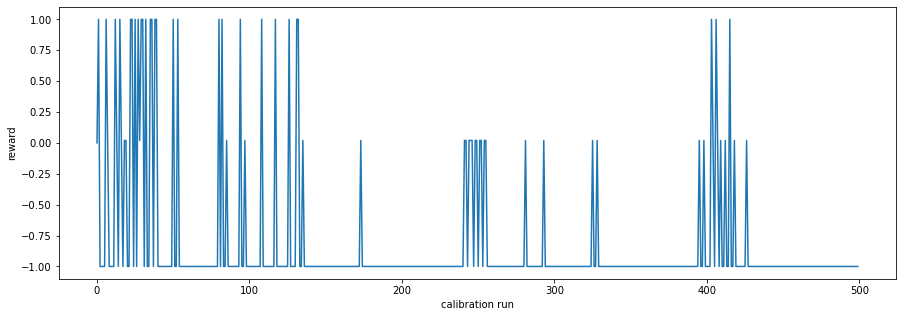

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(results['Reward'])
plt.ylabel('reward')
plt.xlabel('calibration run')
plt.show()

### Decomposition Results

Decompose incidence rate errors

In [9]:
incidence_rate_errors = seasonal_decompose(results['IrE'], period=20, model='additive')

Plot IrE's decomposition

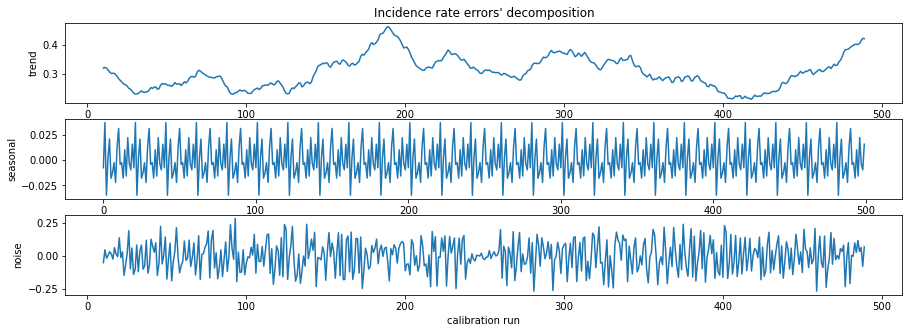

In [10]:
fig, axs = plt.subplots(3, figsize=(15, 5))
axs[0].plot(incidence_rate_errors.trend)
axs[0].set_ylabel('trend')
axs[0].title.set_text("Incidence rate errors' decomposition")
axs[1].plot(incidence_rate_errors.seasonal)
axs[1].set_ylabel('seasonal')
axs[2].plot(incidence_rate_errors.resid)
axs[2].set_ylabel('noise')
plt.xlabel('calibration run')
plt.show()

Decompose exposure rate errors

In [11]:
exposure_rate_errors = seasonal_decompose(results['ErE'], period=20, model='additive')

Plot ErE's decomposition

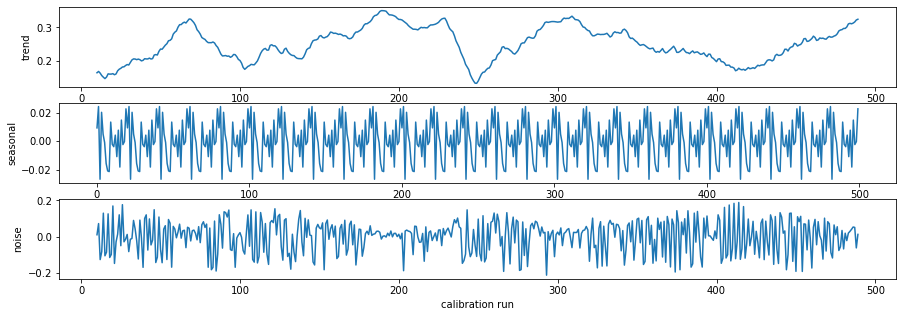

In [12]:
fig, axs = plt.subplots(3, figsize=(15, 5))
axs[0].plot(exposure_rate_errors.trend)
axs[0].set_ylabel('trend')
axs[1].plot(exposure_rate_errors.seasonal)
axs[1].set_ylabel('seasonal')
axs[2].plot(exposure_rate_errors.resid)
axs[2].set_ylabel('noise')
plt.xlabel('calibration run')
plt.show()